# 2DI70 Statistical Learning Theory 
## Assignment 1

### Group x
Name1 ID1

Name2 ID2

Name3 ID3

In [23]:
# Imports here
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import numpy as np
import operator
from sklearn.decomposition import PCA


#### Load MNIST data from csv files

In [24]:
train_small = pd.read_csv("MNIST_train_small.csv").values
test_small  = pd.read_csv("MNIST_test_small.csv").values

In [25]:
## Normalizing the data is probably not necessary for this specific dataset
X_train_s = train_small[:, 1:]/255.0
y_train_s = train_small[:,0]

X_test_s = test_small[:, 1:]/255.0
y_test_s = test_small[:,0]

#### Define functions

145


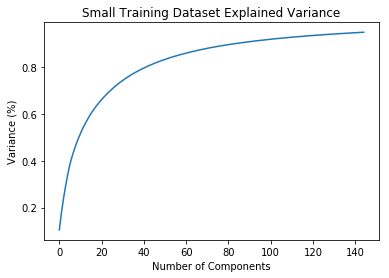

In [26]:
#Fitting the PCA algorithm with training dataset
pca = PCA(.95)
pca.fit(X_train_s)
print(pca.n_components_)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Small Training Dataset Explained Variance')
plt.show()

In [17]:
#The above plot and pca fitting tells us that selecting 145 components we can preserve something around 95% of the total variance
#of the data. It makes sense, we’ll not use 100% of our variance, because it denotes all components,
#and we want only the principal ones.
# With this information in our hands, we can implement the PCA for 145 best components by using this snippet of code:

PCA_X_train_s = pca.transform(X_train_s)


In [18]:
## Compute the nth root of given value
def n_root(val, p):   
    return val**(1 / float(p))
  
## Compute Minkowski distance for two given vectors
## Use p = 2 for Euclidian distance
def minkowski_dist(x1, x2, p):    
    p_sum = sum(pow(abs(a-b), p) for a, b in zip(x1, x2))
    return n_root(p_sum, p) 
  
v1 = X_train_s[0]
v2 = X_train_s[1]
print(minkowski_dist(v1, v2, 2)) 

8.617445178210408


In [19]:
## Compute p-minkowski distance from point to every datapoint in collection
## The list of labels should share length and indices with collection
def compute_dists(point, collection, labels, p):
    vals = []
    for i in range(len(collection)):
        d = minkowski_dist(point, collection[i], p)
        vals.append([i, d, labels[i]])
    
    return vals

#### Do KNN magic

In [22]:
#1g. Using new dataset of PCA_X_train_s to reduce 784 dimensions on original X_train_s to 200 dimensions
#Apply the new dataset using pure k-nn, k = 20
#Predefine number of top k-nn, power p for Euclidean or Minkowski distance, length of training folds
k = 1
p = 2 
r = len(X_train_s)
error = 0

#for each point in train set of n values, compute the distance with all n-1 data points in training set (excluding the point selected)
# then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(PCA_X_train_s[i], PCA_X_train_s, y_train_s, p)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:k] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors:
    pred_class = {}
    for j in range(k):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
        #sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True) 
    if sortedVotes[0][0] != y_train_s[i]:
        error = error + 1
    print(sortedVotes[0][0],y_train_s[i],error)
print("total percentage of error" + str(error/r))

3 3 0
9 9 0
3 3 0
1 1 0
3 3 0
6 6 0
8 8 0
4 4 0
0 0 0
1 1 0
9 9 0
5 5 0
4 4 0
7 7 0
4 4 0
8 8 0
4 4 0
2 2 0
6 6 0
9 9 0
2 2 0
8 8 0
4 4 0
9 9 0
4 4 0
9 9 0
9 9 0
4 4 0
5 5 0
8 8 0
1 1 0
1 1 0
1 1 0
6 6 0
1 1 0
0 0 0
2 2 0
7 7 0
5 5 0
6 6 0
9 9 0
2 2 0
4 4 0
7 7 0
6 6 0
5 5 0
7 7 0
5 5 0
6 6 0
9 9 0
8 8 0
9 9 0
2 2 0
6 6 0
0 0 0
3 3 0
9 9 0
5 5 0
1 1 0
7 7 0
2 2 0
0 0 0
7 7 0
1 1 0
1 1 0
5 5 0
0 0 0
9 9 0
6 6 0
9 9 0
2 2 0
7 7 0
9 9 0
6 6 0
1 1 0
6 6 0
5 5 0
0 0 0
6 6 0
5 5 0
6 6 0
3 3 0
3 3 0
9 9 0
6 6 0
4 4 0
0 0 0
5 5 0
5 5 0
3 3 0
8 8 0
4 4 0
9 9 0
2 2 0
7 7 0
0 0 0
7 7 0
6 6 0
7 7 0
2 2 0
5 5 0
8 8 0
3 3 0
4 4 0
9 9 0
9 9 0
5 5 0
0 0 0
9 9 0
1 1 0
6 6 0
6 6 0
9 9 0
6 6 0
3 3 0
4 4 0
3 3 0
2 2 0
8 8 0
2 2 0
9 9 0
5 5 0
0 0 0
0 0 0
0 0 0
7 7 0
4 4 0
3 3 0
1 1 0
5 5 0
8 8 0
9 9 0
1 1 0
6 6 0
0 0 0
8 8 0
6 6 0
7 7 0
0 0 0
1 1 0
8 8 0
1 1 0
0 0 0
7 7 0
9 9 0
1 1 0
9 9 0
1 1 0
2 2 0
7 7 0
8 8 0
8 8 0
8 8 0
7 7 0
3 3 0
9 9 0
1 1 0
1 1 0
5 5 0
1 1 0
1 1 0
3 3 0
9 9 0
3 3 0
3 3 0
4 4 0
2 2 

KeyboardInterrupt: 

In [21]:
#1g. Using new dataset of PCA_X_train_s to reduce 784 dimensions on original X_train_s to 200 dimensions
#Apply the new dataset using LOOCV, k = 20
#Predefine number of top k-nn, power p for Euclidean or Minkowski distance, length of training folds
k = 20
p = 2 
r = len(X_train_s)
error = 0

#for each point in train set of n values, compute the distance with all n-1 data points in training set (excluding the point selected)
# then sort in distance for top 20 nearest neighbors
for i in range(r):
    dists = compute_dists(PCA_X_train_s[i], PCA_X_train_s[np.arange(len(X_train_s))!=i], y_train_s, p)
    dists_sorted = sorted(dists, key = lambda x: float(x[1]))
    list = dists_sorted[0:k] #get list top 20 nearest neighbors with its [index,distance,label] 
     
#count frequency of labels of the top 20 nearest neighbors:
    pred_class = {}
    for j in range(k):
        labels = list[j][-1]
        if labels in pred_class:
            pred_class[labels] += 1
        else:
            pred_class[labels] = 1
        #sort the most frequency labels at the beginning, return the prediction as the most frequency label at first position
    sortedVotes = sorted(pred_class.items(), key=operator.itemgetter(1), reverse=True) 
    if sortedVotes[0][0] != y_train_s[i]:
        error = error + 1
    print(sortedVotes[0][0],y_train_s[i],error)
print("total percentage of error" + str(error/r))



9 3 1
7 9 2
3 3 2
7 1 3
6 3 4
8 6 5
7 8 6
0 4 7
0 0 7
9 1 8
0 9 9
4 5 10
7 4 11
4 7 12
3 4 13
0 8 14
7 4 15
1 2 16
0 6 17
9 9 17
9 2 18
0 8 19
0 4 20
7 9 21
9 4 22
5 9 23
9 9 23
6 4 24
1 5 25
8 8 25
6 1 26
3 1 27
8 1 28
9 6 29
1 1 29
0 0 29
0 2 30
9 7 31
0 5 32
2 6 33
1 9 34
3 2 35
7 4 36
7 7 36
1 6 37
2 5 38
0 7 39
0 5 40
9 6 41
3 9 42
5 8 43
9 9 43
0 2 44
7 6 45
5 0 46
9 3 47
8 9 48
1 5 49
0 1 50
1 7 51
8 2 52
2 0 53
1 7 54
1 1 54
2 1 55
9 5 56
1 0 57
9 9 57
3 6 58
8 9 59
0 2 60
1 7 61
1 9 62
3 6 63
0 1 64
6 6 64
9 5 65
0 0 65
9 6 66
3 5 67
0 6 68
3 3 68
3 3 68
6 9 69
9 6 70
1 4 71
0 0 71
1 5 72
1 5 73
7 3 74
7 8 75
6 4 76
9 9 76
0 2 77
0 7 78
6 0 79
1 7 80
8 6 81
1 7 82
0 2 83
0 5 84
2 8 85
3 3 85
7 4 86
9 9 86
0 9 87
9 5 88
0 0 88
9 9 88
6 1 89
6 6 89
0 6 90
4 9 91
0 6 92
3 3 92
9 4 93
9 3 94
0 2 95
2 8 96
1 2 97
3 9 98
6 5 99
0 0 99
0 0 99
5 0 100
7 7 100
0 4 101
0 3 102
9 1 103
5 5 103
5 8 104
3 9 105
3 1 106
3 6 107
0 0 107
3 8 108
6 6 108
7 7 108
0 0 108
3 1 109
1 8 110
1 1 110

1 1 482
7 4 483
0 0 483
3 3 483
0 0 483
6 6 483
0 0 483
7 7 483
0 0 483
0 0 483
2 2 483
2 2 483
3 3 483
2 2 483
1 1 483
0 0 483
3 3 483
2 2 483
7 7 483
4 9 484
6 6 484
9 9 484
7 7 484
9 9 484
3 3 484
1 1 484
0 6 485
4 4 485
0 0 485
7 7 485
7 7 485
8 5 486
3 3 486
3 3 486
9 7 487
4 4 487
2 2 487
2 2 487
0 0 487
0 0 487
5 5 487
2 2 487
0 0 487
1 1 487
5 5 487
3 3 487
3 3 487
1 1 487
3 4 488
7 7 488
8 8 488
4 4 488
4 4 488
1 3 489
6 6 489
3 3 489
5 5 489
2 2 489
8 8 489
7 7 489
7 7 489
0 0 489
1 1 489
5 2 490
7 7 490
2 2 490
5 5 490
4 4 490
3 3 490
3 3 490
3 3 490
6 5 491
9 9 491
2 2 491
9 9 491
9 9 491
6 6 491
1 4 492
5 3 493
3 3 493
6 6 493
9 9 493
9 8 494
7 7 494
0 0 494
9 9 494
8 8 494
9 9 494
8 8 494
7 7 494
6 6 494
2 2 494
0 0 494
3 3 494
2 2 494
3 3 494
7 7 494
1 3 495
5 5 495
9 7 496
7 7 496
0 0 496
5 5 496
3 3 496
1 1 496
2 2 496
5 5 496
3 3 496
5 5 496
0 0 496
9 8 497
0 0 497
0 0 497
7 7 497
5 5 497
7 7 497
3 3 497
7 7 497
5 5 497
8 8 497
0 0 497
2 2 497
4 4 497
7 7 497
7 7 497


3 3 599
6 6 599
1 1 599
3 3 599
3 3 599
4 4 599
5 5 599
9 6 600
6 6 600
4 4 600
0 0 600
1 1 600
1 1 600
3 3 600
1 1 600
3 3 600
8 8 600
2 2 600
6 6 600
1 1 600
0 0 600
4 4 600
1 1 600
1 1 600
0 0 600
4 4 600
1 1 600
2 2 600
1 1 600
4 2 601
7 7 601
4 4 601
2 2 601
2 2 601
7 7 601
6 6 601
3 3 601
2 2 601
8 8 601
6 6 601
8 8 601
0 0 601
9 9 601
1 1 601
1 1 601
0 0 601
1 1 601
6 6 601
7 7 601
9 3 602
3 3 602
0 0 602
4 4 602
8 8 602
1 2 603
1 1 603
9 9 603
7 7 603
9 9 603
8 8 603
8 2 604
3 3 604
6 6 604
4 4 604
0 0 604
2 2 604
3 3 604
9 4 605
5 5 605
9 9 605
9 9 605
0 0 605
0 2 606
6 6 606
0 9 607
2 2 607
5 5 607
0 0 607
3 3 607
9 9 607
0 0 607
0 0 607
0 0 607
8 8 607
5 5 607
8 8 607
1 1 607
0 0 607
6 6 607
0 0 607
3 3 607
5 5 607
3 3 607
1 1 607
8 4 608
0 0 608
0 0 608
6 6 608
4 4 608
5 3 609
1 1 609
4 4 609
7 7 609
3 3 609
2 2 609
7 7 609
3 8 610
9 9 610
6 6 610
6 6 610
6 6 610
1 8 611
6 6 611
3 3 611
1 1 611
7 9 612
3 3 612
6 6 612
9 9 612
6 6 612
3 3 612
1 1 612
0 0 612
0 0 612
9 5 613
